Cargo todo

In [1]:
import pandas as pd
import numpy as np
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import plotly.offline as pyoff
import plotly.graph_objs as go
from sklearn import preprocessing
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from scipy.stats import boxcox
from scipy.special import inv_boxcox
pd.set_option('display.max_row', 1000)
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Cargo los datos

In [2]:
serieSconst = pd.read_csv('serieSconst.csv', encoding= 'unicode_escape', delimiter=',')
# Convert Date to datetime
serieSconst['indice_tiempo'] = pd.to_datetime(serieSconst['indice_tiempo'])
serieSconst.tail(5)

,indice_tiempo,ventas_precios_constantes
62,2022-03-01,24612.901369
63,2022-04-01,24141.199035
64,2022-05-01,23235.096273
65,2022-06-01,24144.358859
66,2022-07-01,26090.180313


renombramos para Prophet

In [3]:
serieSconst.columns = ['ds', 'y']
serieSconst.head(1)

,ds,y
0,2017-01-01,27477.307666


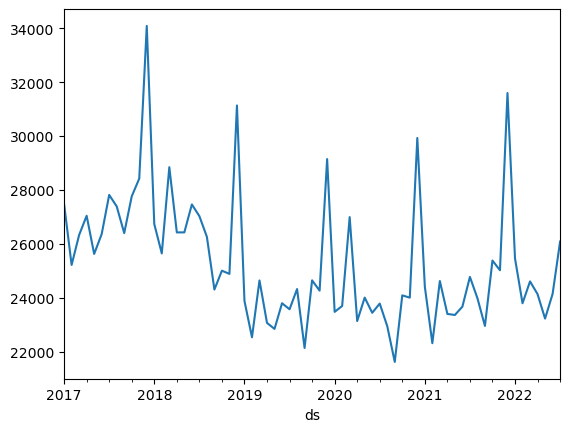

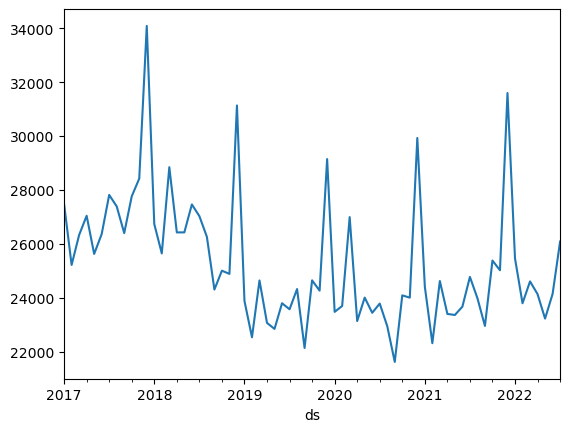

In [4]:
serieSconst.set_index('ds').y.plot().figure

aplicamos prophet m = Prophet(seasonality_mode='multiplicative').fit(serieScorr)

18:21:13 - cmdstanpy - INFO - Chain [1] start processing
18:21:14 - cmdstanpy - INFO - Chain [1] done processing


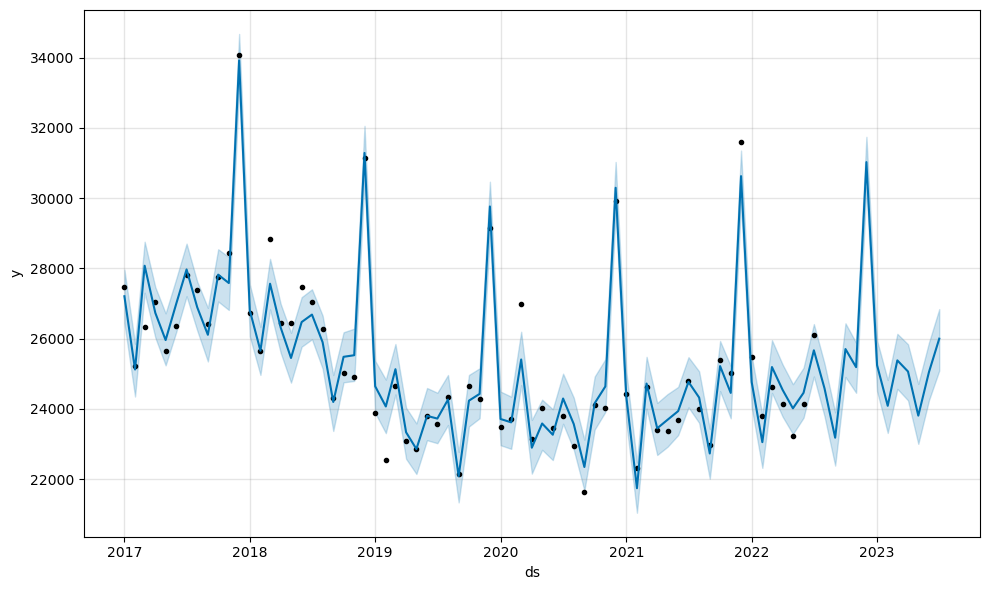

In [5]:
m=Prophet(weekly_seasonality=True)
fitted= m.fit(serieSconst.tail(120))
future = m.make_future_dataframe(periods=12, freq='MS')
fcst = m.predict(future)
fig = m.plot(fcst)

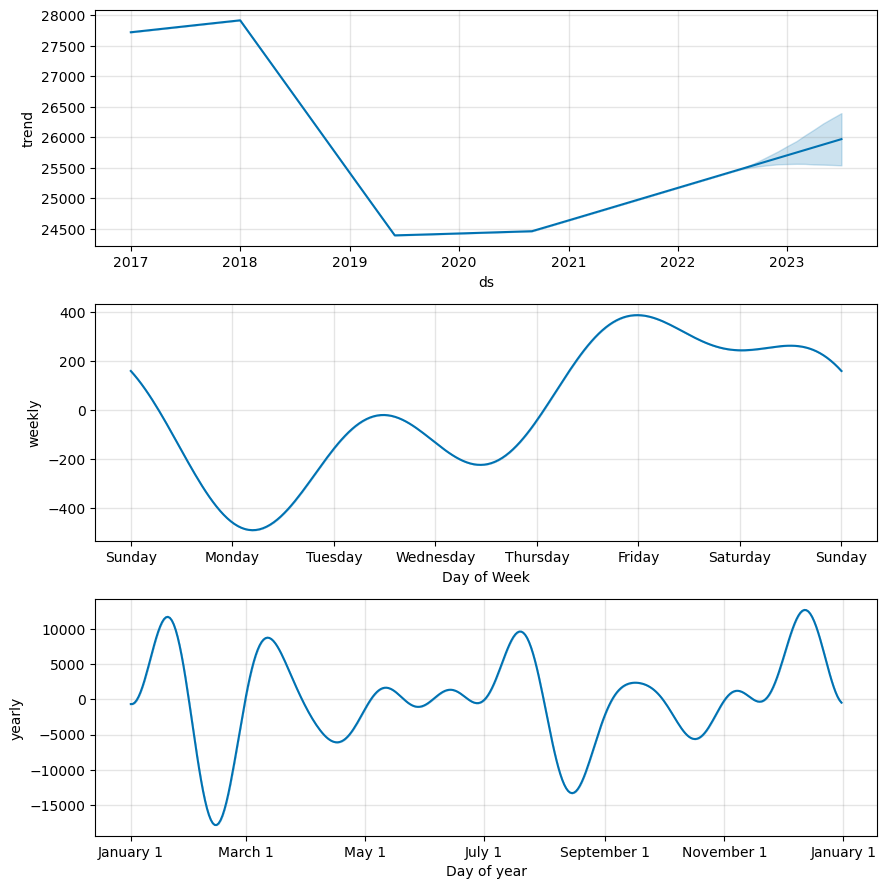

In [6]:
fig2 = m.plot_components(fcst)


In [7]:
fcst.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
67,2022-08-01,25481.362682,23786.107583,25286.246041,25475.878149,25487.477971,-900.184724,-900.184724,-900.184724,-458.775237,-458.775237,-458.775237,-441.409487,-441.409487,-441.409487,0.0,0.0,0.0,24581.177959
68,2022-09-01,25526.703441,22381.523565,23897.415298,25506.055677,25548.835724,-2350.134376,-2350.134376,-2350.134376,-41.837043,-41.837043,-41.837043,-2308.297333,-2308.297333,-2308.297333,0.0,0.0,0.0,23176.569065
69,2022-10-01,25570.581595,24905.925277,26434.948679,25525.881970,25617.313796,130.620090,130.620090,130.620090,244.081971,244.081971,244.081971,-113.461882,-113.461882,-113.461882,0.0,0.0,0.0,25701.201685
70,2022-11-01,25615.922354,24454.823339,25879.616302,25543.416271,25694.029567,-430.856525,-430.856525,-430.856525,-157.812541,-157.812541,-157.812541,-273.043984,-273.043984,-273.043984,0.0,0.0,0.0,25185.065829
71,2022-12-01,25659.800508,30308.535826,31745.208285,25557.182646,25768.714917,5365.782611,5365.782611,5365.782611,-41.837043,-41.837043,-41.837043,5407.619654,5407.619654,5407.619654,0.0,0.0,0.0,31025.583119
72,2023-01-01,25705.141267,24502.095162,25944.325756,25561.870035,25855.619661,-464.260990,-464.260990,-464.260990,159.680933,159.680933,159.680933,-623.941924,-623.941924,-623.941924,0.0,0.0,0.0,25240.880277
73,2023-02-01,25750.482027,23311.056820,24821.108820,25565.613429,25937.399717,-1666.091372,-1666.091372,-1666.091372,-132.904013,-132.904013,-132.904013,-1533.187359,-1533.187359,-1533.187359,0.0,0.0,0.0,24084.390655
74,2023-03-01,25791.434970,24567.830090,26134.442146,25564.187203,26031.365512,-412.924812,-412.924812,-412.924812,-132.904013,-132.904013,-132.904013,-280.020799,-280.020799,-280.020799,0.0,0.0,0.0,25378.510158
75,2023-04-01,25836.775729,24240.508174,25837.351326,25554.564497,26128.071903,-775.100899,-775.100899,-775.100899,244.081971,244.081971,244.081971,-1019.182871,-1019.182871,-1019.182871,0.0,0.0,0.0,25061.674830
76,2023-05-01,25880.653883,23000.484416,24708.670759,25551.847653,26226.513719,-2076.088999,-2076.088999,-2076.088999,-458.775237,-458.775237,-458.775237,-1617.313763,-1617.313763,-1617.313763,0.0,0.0,0.0,23804.564884


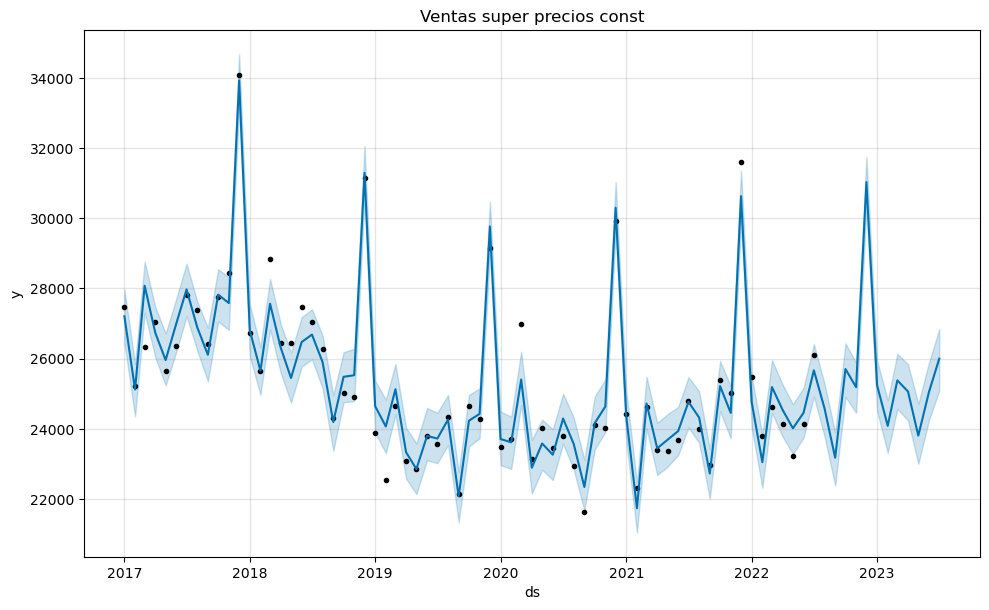

In [8]:
# Plot the graph of this data to get an understanding of how well forecast looks
m.plot(fcst);
plt.title("Ventas super precios const")
plt.show()

In [9]:
cutoffs = pd.date_range(start='2019-01-01', end='2022-04-01', freq='2MS')
print(cutoffs)

DatetimeIndex(['2019-01-01', '2019-03-01', '2019-05-01', '2019-07-01',
               '2019-09-01', '2019-11-01', '2020-01-01', '2020-03-01',
               '2020-05-01', '2020-07-01', '2020-09-01', '2020-11-01',
               '2021-01-01', '2021-03-01', '2021-05-01', '2021-07-01',
               '2021-09-01', '2021-11-01', '2022-01-01', '2022-03-01'],
              dtype='datetime64[ns]', freq='2MS')


In [10]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model=m, horizon='31 days', cutoffs=cutoffs)
df_cv.head()

  0%|          | 0/20 [00:00<?, ?it/s]

18:21:36 - cmdstanpy - INFO - Chain [1] start processing
18:22:16 - cmdstanpy - INFO - Chain [1] done processing
18:22:17 - cmdstanpy - INFO - Chain [1] start processing
18:23:00 - cmdstanpy - INFO - Chain [1] done processing
18:23:01 - cmdstanpy - INFO - Chain [1] start processing
18:23:01 - cmdstanpy - INFO - Chain [1] done processing
18:23:02 - cmdstanpy - INFO - Chain [1] start processing
18:23:03 - cmdstanpy - INFO - Chain [1] done processing
18:23:04 - cmdstanpy - INFO - Chain [1] start processing
18:23:05 - cmdstanpy - INFO - Chain [1] done processing
18:23:06 - cmdstanpy - INFO - Chain [1] start processing
18:23:07 - cmdstanpy - INFO - Chain [1] done processing
18:23:08 - cmdstanpy - INFO - Chain [1] start processing
18:23:09 - cmdstanpy - INFO - Chain [1] done processing
18:23:09 - cmdstanpy - INFO - Chain [1] start processing
18:23:10 - cmdstanpy - INFO - Chain [1] done processing
18:23:11 - cmdstanpy - INFO - Chain [1] start processing
18:23:12 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-02-01,9603.101439,9567.377534,9640.123448,22542.049942,2019-01-01
1,2019-04-01,46389.050196,46324.995375,46449.606143,23073.755385,2019-03-01
2,2019-06-01,26922.557175,26715.500838,27107.965394,23803.413180,2019-05-01
3,2019-08-01,24064.015134,23867.952751,24258.619201,24329.910412,2019-07-01
4,2019-10-01,23501.105610,23195.845639,23811.448756,24652.714424,2019-09-01


In [11]:
df_cv.tail(5)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
15,2021-08-01,24273.242420,23603.789183,24914.217660,23990.069056,2021-07-01
16,2021-10-01,24904.802986,24312.964490,25527.389450,25386.745246,2021-09-01
17,2021-12-01,30226.350759,29619.550906,30865.307009,31596.630982,2021-11-01
18,2022-02-01,23364.066782,22717.868395,23973.503140,23803.202023,2022-01-01
19,2022-04-01,24968.661463,24313.317912,25626.366978,24141.199035,2022-03-01


In [12]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
print(df_p)

  horizon           mse         rmse          mae      mape     mdape  \
0 30 days  2.260386e+06  1503.458023  1270.810802  0.046853  0.045041   
1 31 days  5.321929e+07  7295.154974  3692.063591  0.160382  0.058669   

      smape  coverage  
0  0.047163  0.333333  
1  0.152595  0.285714  


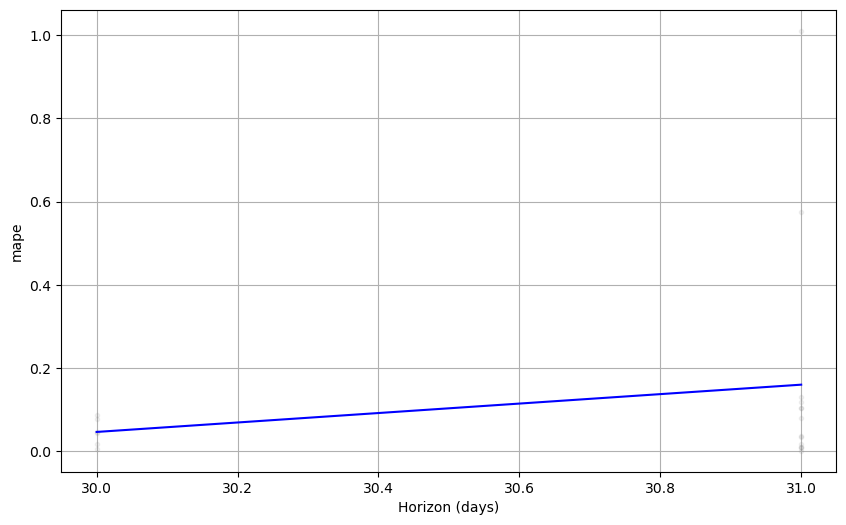

In [13]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


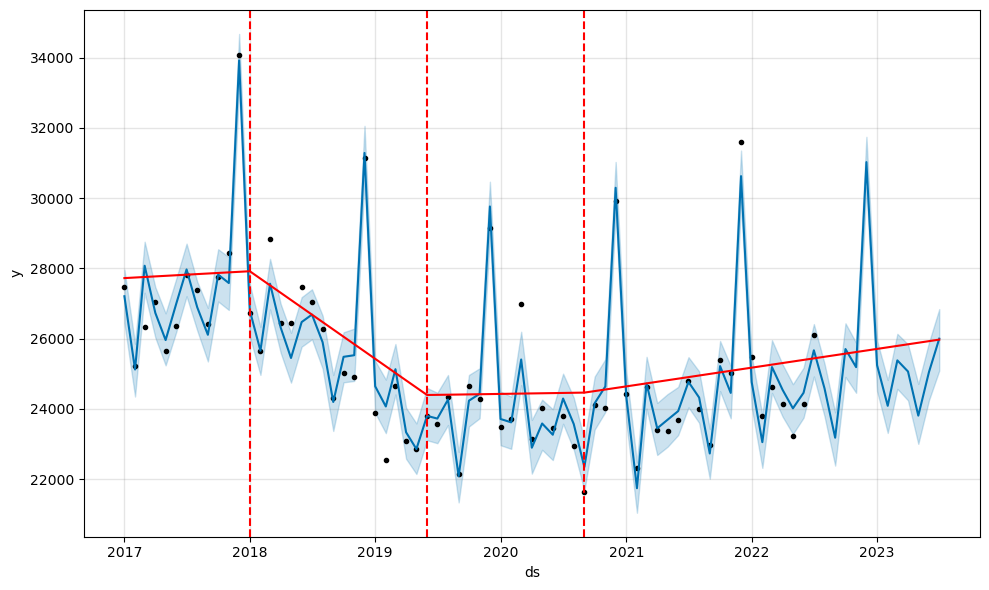

In [14]:
# Plotting with Prophet built-in method
fig = m.plot(fcst)
#ax = fig.add_subplot(111)
#ax.axvline(x=fcst['ds'].max() - pd.Timedelta('180 days'), c='red', lw=2, alpha=0.5, ls='--')
a = add_changepoints_to_plot(fig.gca(), m, fcst)
fig.show()

In [15]:
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
67,2022-08-01,24581.177959,23786.107583,25286.246041
68,2022-09-01,23176.569065,22381.523565,23897.415298
69,2022-10-01,25701.201685,24905.925277,26434.948679
70,2022-11-01,25185.065829,24454.823339,25879.616302
71,2022-12-01,31025.583119,30308.535826,31745.208285
72,2023-01-01,25240.880277,24502.095162,25944.325756
73,2023-02-01,24084.390655,23311.056820,24821.108820
74,2023-03-01,25378.510158,24567.830090,26134.442146
75,2023-04-01,25061.674830,24240.508174,25837.351326
76,2023-05-01,23804.564884,23000.484416,24708.670759
